In [38]:
# 1. Exploratory Data Analysis (EDA)
import pandas as pd
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [39]:
# Data exploration

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical features
print(df.describe())

# Count the number of unique values in each column
for col in df.columns:
  print(col, df[col].nunique())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64
        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000 

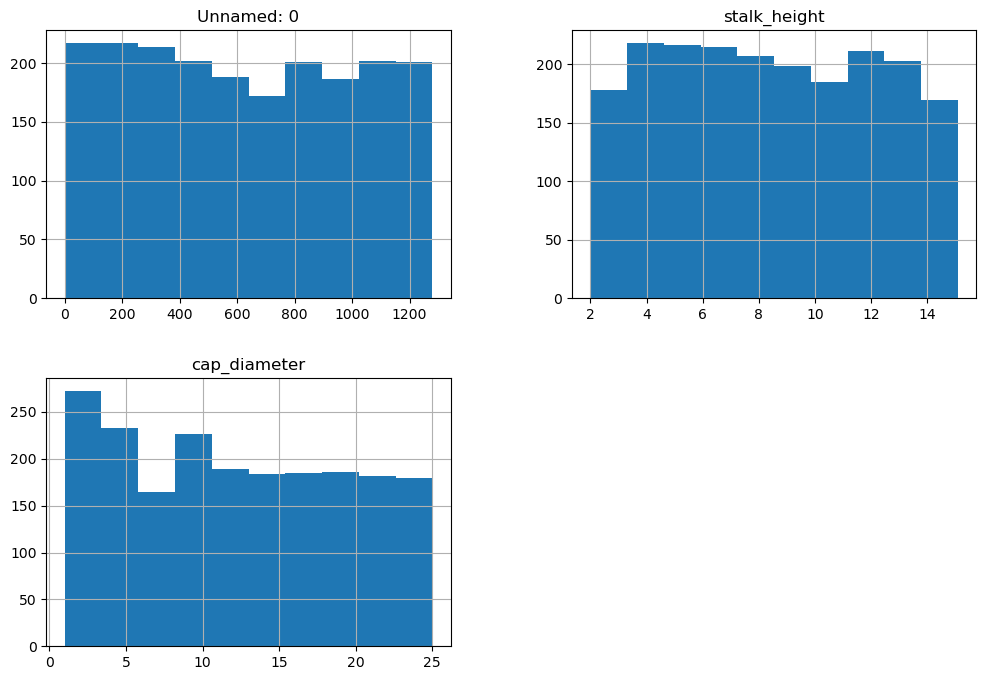

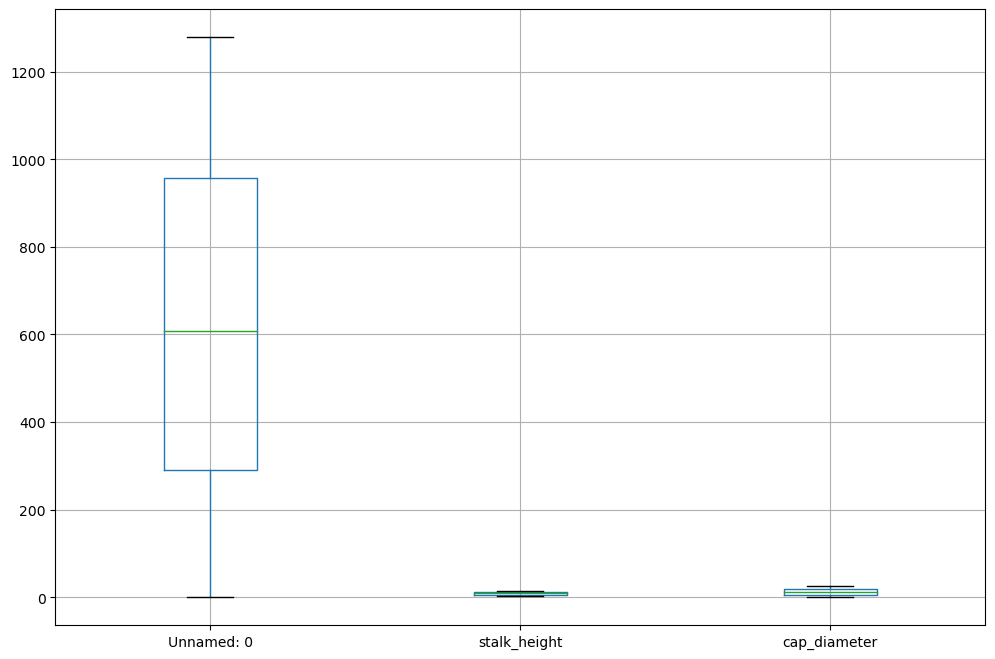

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


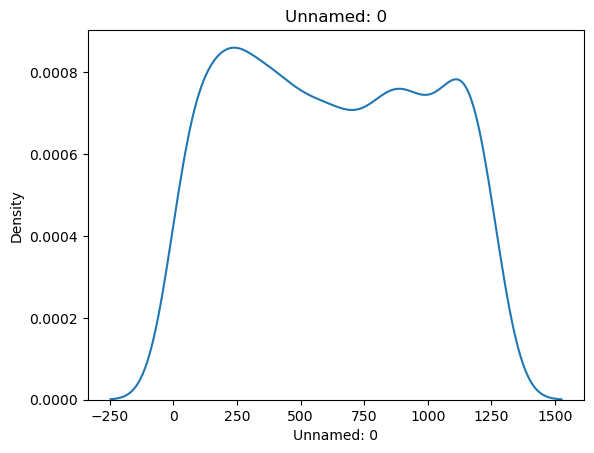

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


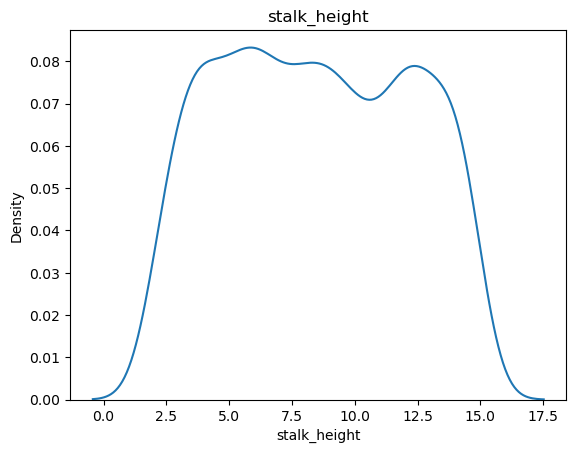

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


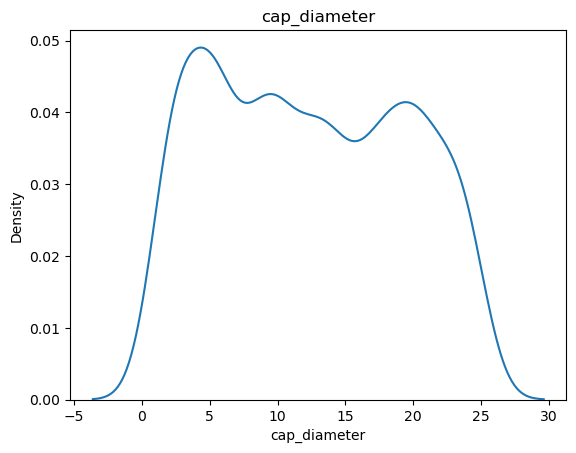

In [4]:
# Utilize histograms, box plots, or density plots to understand feature distributions

import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for numerical features
df.hist(figsize=(12, 8))
plt.show()

# Box plots for numerical features
df.boxplot(figsize=(12, 8))
plt.show()

# Density plots for numerical features
for col in df.select_dtypes(include='number'):
  plt.figure()
  sns.kdeplot(df[col])
  plt.title(col)
  plt.show()

In [41]:
#Standardization
X_cont = df[['Unnamed: 0', 'stalk_height', 'cap_diameter']]

from sklearn.preprocessing import StandardScaler 
SS = StandardScaler()
X_cont_SS = SS.fit_transform(X_cont)
X_cont_SS = pd.DataFrame(X_cont_SS)
X_cont_SS.columns = list(X_cont)
X_cont_SS.head()

,Unnamed: 0,stalk_height,cap_diameter
0,1.445410,1.576459,-1.030123
1,1.098741,-1.216463,0.958407
2,-0.842601,0.163717,-0.724904
3,-0.914602,-0.871852,1.222967
4,0.520072,1.511897,0.032765


In [42]:
# 2. Data Preprocessing
# Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder

X_cate = df.drop(['Unnamed: 0', 'stalk_height', 'cap_diameter'], axis=1)

label_encoders = {}
for col in X_cate.columns:
  LE = LabelEncoder()
  X_cate[col] = LE.fit_transform(X_cate[col])
  label_encoders[col] = LE

X_cate.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


In [43]:
# Concatenate numerical and encoded categorical features
X = pd.concat([X_cont_SS, X_cate], axis=1)
X.head()

# Prepare the target variable
Y = X_cate.iloc[:,22:]
Y.head() 

,class
0,1
1,0
2,1
3,1
4,1


In [44]:
print(X.shape)
print(Y.shape)

(2000, 26)
(2000, 1)


In [8]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

              Unnamed: 0  stalk_height  cap_diameter  cap_shape  cap_surface  \
Unnamed: 0      1.000000     -0.001508      0.051881   0.076872    -0.018136   
stalk_height   -0.001508      1.000000     -0.003486   0.024540     0.043482   
cap_diameter    0.051881     -0.003486      1.000000   0.037743     0.016606   
cap_shape       0.076872      0.024540      0.037743   1.000000    -0.003244   
cap_surface    -0.018136      0.043482      0.016606  -0.003244     1.000000   

              cap_color   bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0     0.024111 -0.046627 -0.012730        -0.005051      0.048191   
stalk_height   0.044086  0.064644  0.011217        -0.017367      0.016429   
cap_diameter  -0.000489 -0.046946 -0.051549        -0.039526      0.029169   
cap_shape      0.009615 -0.001190 -0.030119         0.015477     -0.048783   
cap_surface    0.003153 -0.021352 -0.021926        -0.010513      0.068918   

              ...  stalk_color_above_ring  stalk_c

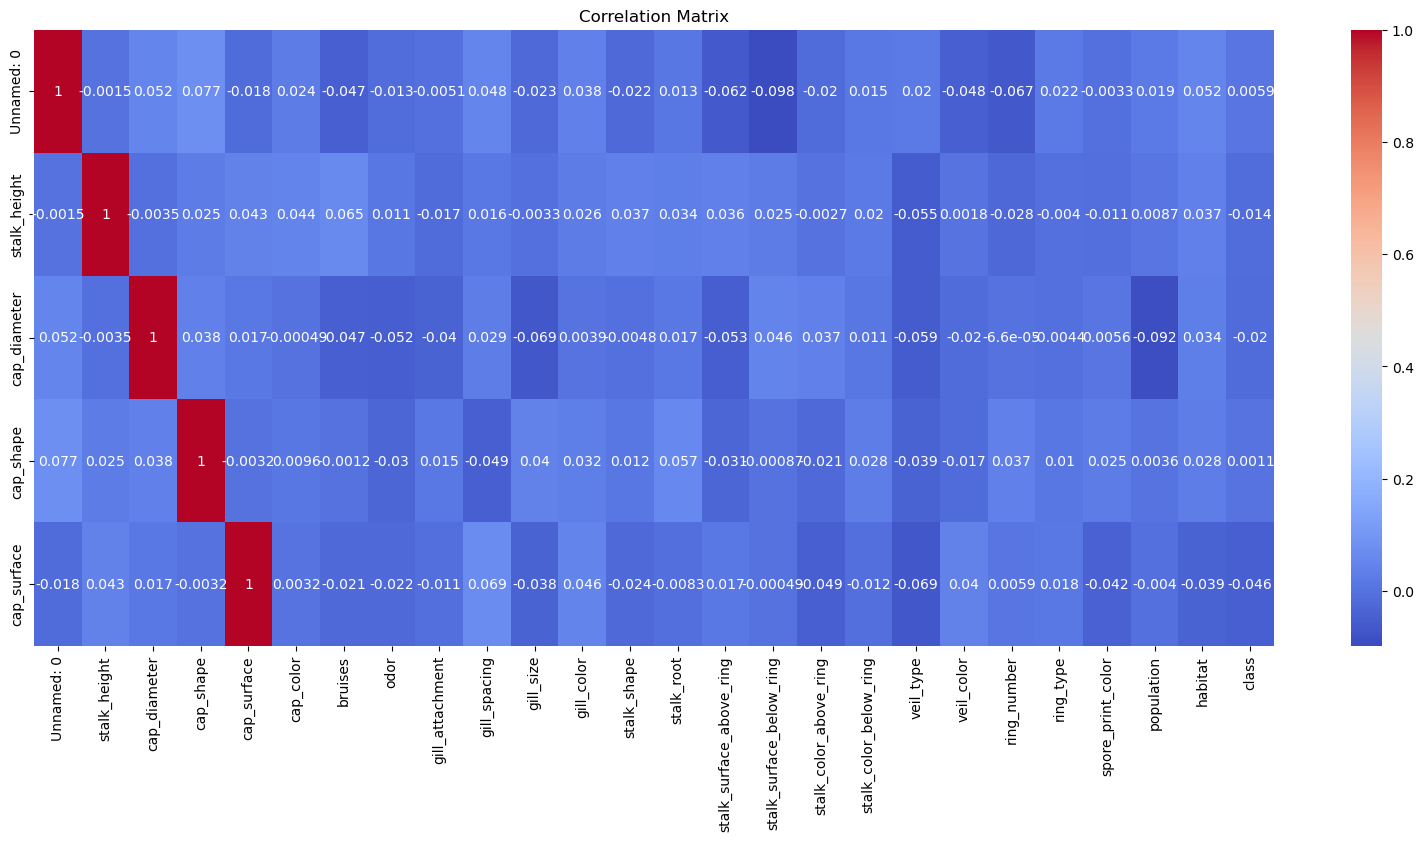

In [9]:
# Investigate feature correlations to discern relationships within the data

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = X.corr().head()

print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

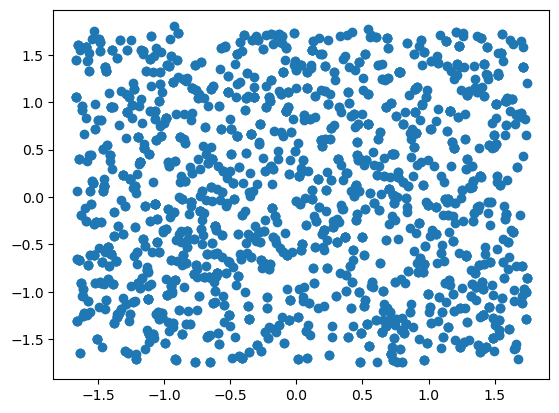

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwarg

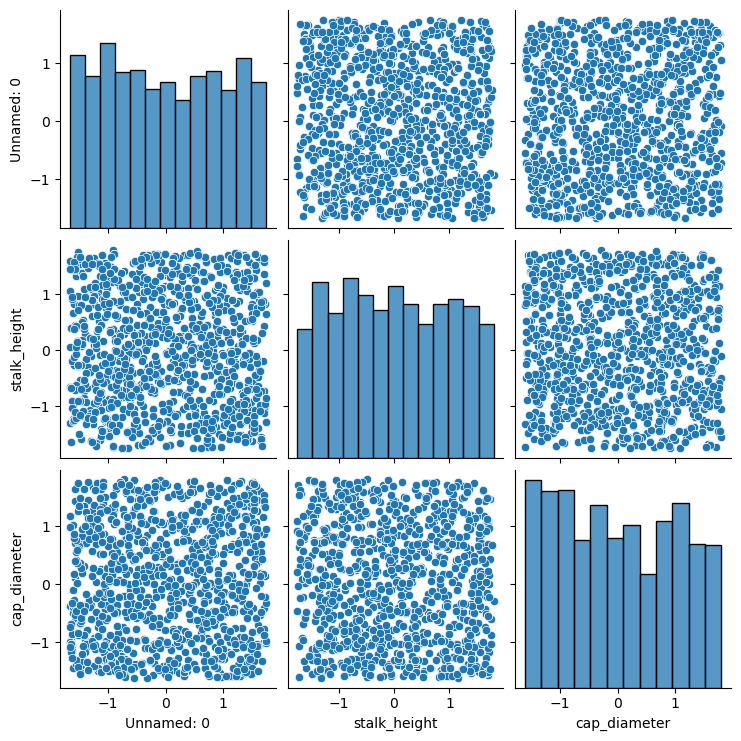

In [10]:
# 3. Data Visualization
# Employ scatter plots or pair plots to comprehend feature distributions and relationships

import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plots for pairs of numerical features
plt.scatter(X_cont_SS["Unnamed: 0"], X_cont_SS["stalk_height"])
plt.show() 

# Pair plots for numerical features
sns.pairplot(X_cont_SS)
plt.show() 

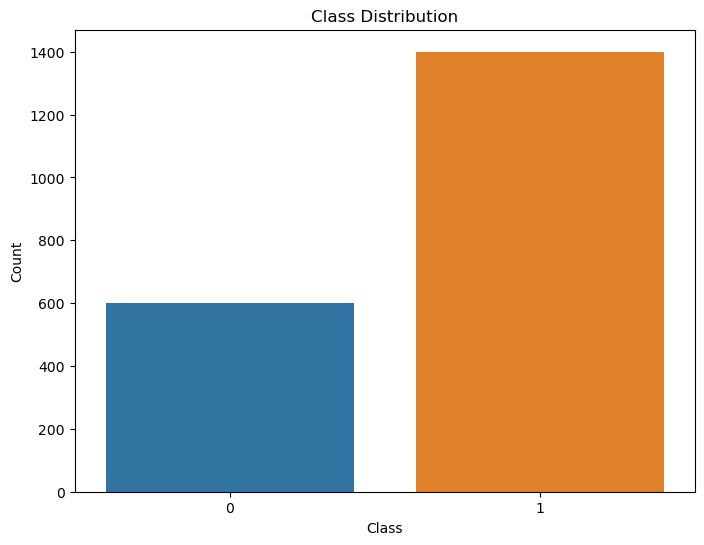

In [11]:
# Visualize class distributions to gauge dataset balance or imbalance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x=Y.iloc[:,0], data=Y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [37]:
# 4. SVM Implementation
# Implement a basic SVM classifier using Python libraries like scikit-learn.
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=3)

# Train the SVM model on the training data.
model.fit(X_train, y_train)  

# Make predictions on the testing data
y_pred = model.predict(X_test)

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) 

Accuracy: 0.9975
Precision: 0.9982456140350877
Recall: 0.9956896551724138
F1-score: 0.9969567632133538


C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


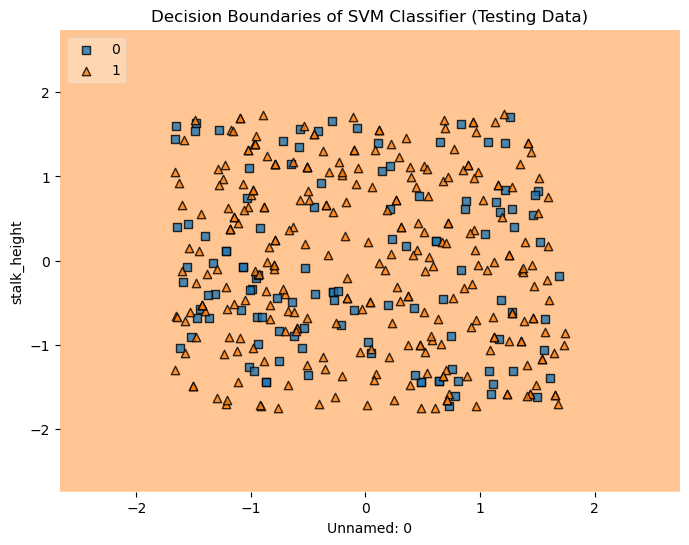

In [27]:
# 5. Visualization of SVM Results
# Visualize classification results on the testing data
import matplotlib.pyplot as plt

X_test_visual = X_test.iloc[:, :2]
y_test_visual = y_test

model_visual = SVC(kernel='rbf', gamma='scale')
model_visual.fit(X_test_visual, y_test_visual)

# Plot decision boundaries
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_visual.values, y_test_visual.values.flatten(), clf=model_visual, legend=2)
plt.xlabel(X_test_visual.columns[0])
plt.ylabel(X_test_visual.columns[1])
plt.title('Decision Boundaries of SVM Classifier (Testing Data)')
plt.show()

In [35]:
# 6. Parameter Tuning and Optimization
# Experiment with different SVM hyperparameters

from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid to search
param_grid = {
    'kernel': ['poly'],
    'C': [2],
    'gamma': ['scale'] 
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred_best = best_model.predict(X_test)

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best Hyperparameters: {'C': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [36]:
# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

print("Best Model Performance:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)

Best Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [33]:
# 7. Comparison and Analysis
# Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function)

# Initialize SVM classifiers with different kernels
model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_rbf = SVC(kernel='rbf')

# Fit the classifiers to the training data
model_linear.fit(X_train, y_train)
model_poly.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = model_linear.predict(X_test)
y_pred_poly = model_poly.predict(X_test)
y_pred_rbf = model_rbf.predict(X_test)

# Evaluate the models' performance
def evaluate_model(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')
  return accuracy, precision, recall, f1

accuracy_linear, precision_linear, recall_linear, f1_linear = evaluate_model(y_test, y_pred_linear)
accuracy_poly, precision_poly, recall_poly, f1_poly = evaluate_model(y_test, y_pred_poly)
accuracy_rbf, precision_rbf, recall_rbf, f1_rbf = evaluate_model(y_test, y_pred_rbf)

# Print the performance metrics for each kernel
print("Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-score:", f1_linear)
print("\n")

print("Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-score:", f1_poly)
print("\n")

print("Radial Basis Function (RBF) Kernel:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-score:", f1_rbf)

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Polynomial Kernel:
Accuracy: 0.9975
Precision: 0.9982456140350877
Recall: 0.9956896551724138
F1-score: 0.9969567632133538


Radial Basis Function (RBF) Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [34]:
# Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

# Strengths of SVM for Mushroom Dataset:

# SVM generally performs well on datasets with clear separation between classes, as observed in the Mushroom dataset.
# SVM is less susceptible to outliers compared to some other algorithms due to its focus on maximizing the margin between classes.
# SVM can handle datasets with many features, which is relevant for the Mushroom dataset with its numerous categorical attributes.

# Weaknesses of SVM for Mushroom Dataset:

# The performance of SVM can be significantly affected by the choice of kernel and regularization parameters (C, gamma).
# Training SVM can be computationally expensive for very large datasets, especially with non-linear kernels.
# SVM models can be difficult to interpret, especially with non-linear kernels, making it harder to understand the reasoning behind predictions.


# Discuss practical implications of SVM in real-world classification tasks.

# Image Recognition: SVM has been successfully applied to image classification tasks, such as object recognition and facial recognition.
# Text Classification: SVM is used for text categorization, spam filtering, and sentiment analysis.
# Fraud Detection: SVM can be used to detect fraudulent transactions based on patterns in financial data.
# Medical Diagnosis: SVM can help classify medical conditions based on patient data and symptoms.